In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('WineQT.csv') #load data-set

In [3]:
df.shape #number of rows and columns

(1143, 13)

In [4]:
df.shape[0] #number of rows

1143

In [5]:
df.shape[1] #number of columns

13

In [6]:
df.dtypes  #datatypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [7]:
summary_stats = df.describe()
summary_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
mean_values = df.mean() #mean value of the numerical data
mean_values

fixed acidity             8.311111
volatile acidity          0.531339
citric acid               0.268364
residual sugar            2.532152
chlorides                 0.086933
free sulfur dioxide      15.615486
total sulfur dioxide     45.914698
density                   0.996730
pH                        3.311015
sulphates                 0.657708
alcohol                  10.442111
quality                   5.657043
Id                      804.969379
dtype: float64

In [9]:
median_values = df.median() #median value of the numerical data
median_values

fixed acidity             7.90000
volatile acidity          0.52000
citric acid               0.25000
residual sugar            2.20000
chlorides                 0.07900
free sulfur dioxide      13.00000
total sulfur dioxide     37.00000
density                   0.99668
pH                        3.31000
sulphates                 0.62000
alcohol                  10.20000
quality                   6.00000
Id                      794.00000
dtype: float64

In [10]:
#mode calculation
#In case there are multiple modes, this selects the first one
mode_values = df.mode().iloc[0] #mode value of the numerical data
mode_values

fixed acidity            7.2000
volatile acidity         0.5000
citric acid              0.0000
residual sugar           2.0000
chlorides                0.0800
free sulfur dioxide      6.0000
total sulfur dioxide    28.0000
density                  0.9976
pH                       3.3000
sulphates                0.6000
alcohol                  9.5000
quality                  5.0000
Id                       0.0000
Name: 0, dtype: float64

In [11]:
range_values = df.max() - df.min() #range values of the numerical data
range_values

fixed acidity             11.30000
volatile acidity           1.46000
citric acid                1.00000
residual sugar            14.60000
chlorides                  0.59900
free sulfur dioxide       67.00000
total sulfur dioxide     283.00000
density                    0.01362
pH                         1.27000
sulphates                  1.67000
alcohol                    6.50000
quality                    5.00000
Id                      1597.00000
dtype: float64

In [12]:
std_deviation = df.std() #standard deviation of the numerical data
std_deviation

fixed acidity             1.747595
volatile acidity          0.179633
citric acid               0.196686
residual sugar            1.355917
chlorides                 0.047267
free sulfur dioxide      10.250486
total sulfur dioxide     32.782130
density                   0.001925
pH                        0.156664
sulphates                 0.170399
alcohol                   1.082196
quality                   0.805824
Id                      463.997116
dtype: float64

In [13]:
categorical_columns = df.select_dtypes(include='number').columns

for column in categorical_columns:
    frequency_distribution = df[column].value_counts()
    print(f"Frequency distribution for {column}:\n{frequency_distribution}\n")

Frequency distribution for fixed acidity:
fixed acidity
7.2     43
7.1     41
7.0     40
7.8     40
7.5     37
        ..
4.6      1
13.7     1
13.4     1
13.5     1
12.2     1
Name: count, Length: 91, dtype: int64

Frequency distribution for volatile acidity:
volatile acidity
0.600    32
0.500    32
0.430    31
0.390    29
0.580    28
         ..
1.035     1
0.565     1
0.865     1
0.965     1
0.160     1
Name: count, Length: 135, dtype: int64

Frequency distribution for citric acid:
citric acid
0.00    99
0.49    47
0.24    42
0.02    35
0.01    26
        ..
0.61     1
0.72     1
1.00     1
0.75     1
0.62     1
Name: count, Length: 77, dtype: int64

Frequency distribution for residual sugar:
residual sugar
2.00    107
2.10    103
1.80     92
2.20     88
1.90     80
       ... 
7.30      1
7.20      1
2.95      1
3.65      1
4.40      1
Name: count, Length: 80, dtype: int64

Frequency distribution for chlorides:
chlorides
0.080    48
0.077    41
0.074    38
0.084    38
0.078    36
 

In [14]:
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values for{column}:\n{unique_values}\n")

Unique values forfixed acidity:
[ 7.4  7.8 11.2  7.9  7.3  6.7  5.6  8.5  7.6  6.9  6.3  7.1  8.3  5.2
  8.1  8.8  7.5  4.6  7.7  6.6  8.6 10.2  7.   7.2  8.   6.8  6.2  9.3
  5.   8.4 10.1  9.4  8.2  5.8  9.2  8.9  6.4 11.5  9.6 12.8  9.7  8.7
 12.  15.  10.8 11.1 10.  12.5 10.3 11.4  9.9 11.6 10.4 13.3 10.6  9.
  9.8 13.4 11.9 10.9 13.8  9.1 13.5  6.1 10.5 12.6 13.7  9.5 12.2 12.3
 15.6  5.3 11.3 13.   6.5 10.7 12.9 14.3 12.4 15.5 12.7 13.2 15.9  5.1
 11.8  4.9  5.9 11.7  5.4  5.7  6. ]

Unique values forvolatile acidity:
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.615 0.61  0.32  0.39
 0.43  0.49  0.4   0.41  0.71  0.645 0.675 0.655 0.38  0.45  0.52  0.935
 0.5   0.51  0.42  0.59  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3
 0.55  0.62  1.02  0.775 0.9   0.545 0.575 0.63  0.56  0.31  0.54  1.07
 0.695 1.33  0.745 1.04  0.415 0.34  0.67  0.68  0.33  0.95  0.53  0.64
 0.885 0.805 0.73  0.37  1.09  0.44  0.57  0.48  1.    0.635 0.21  0.35
 0.975 0.87  0.18  0.26  0.27  0.36  0

In [15]:
sns.set(style="whitegrid")

In [23]:
numeric_columns = df.select_dtypes(include='number')

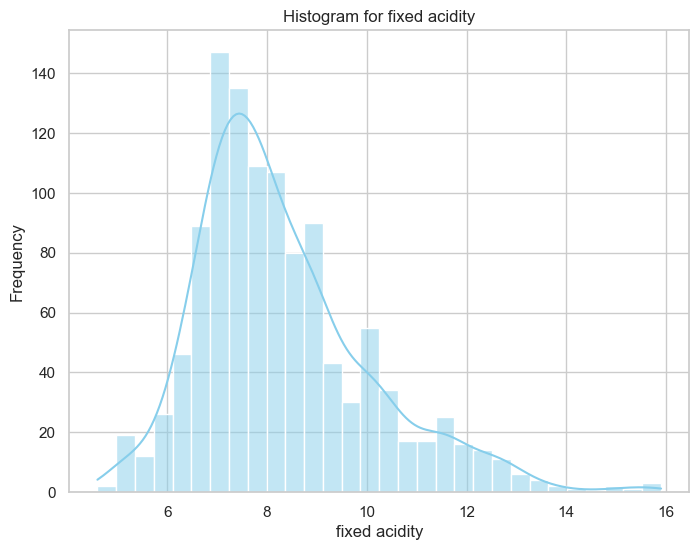

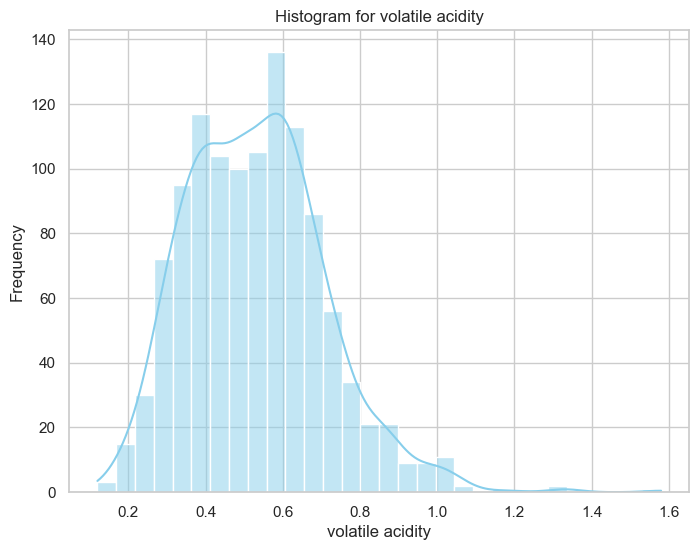

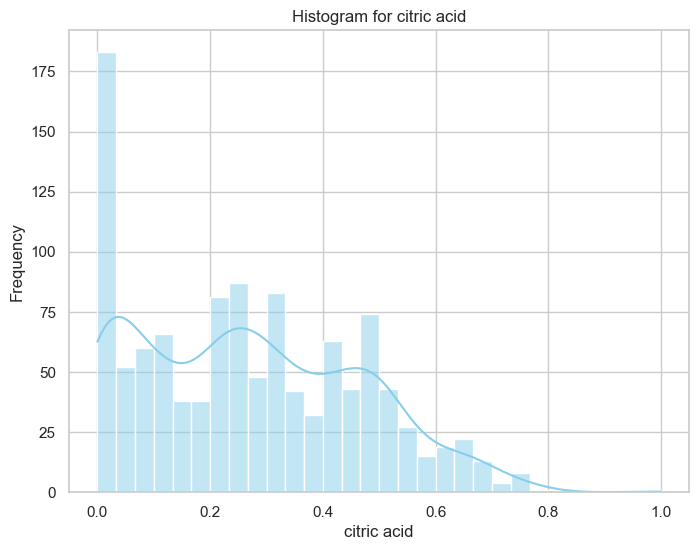

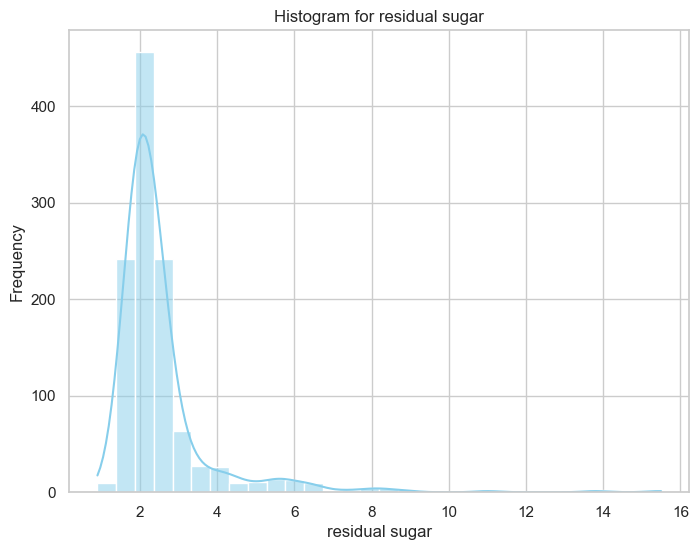

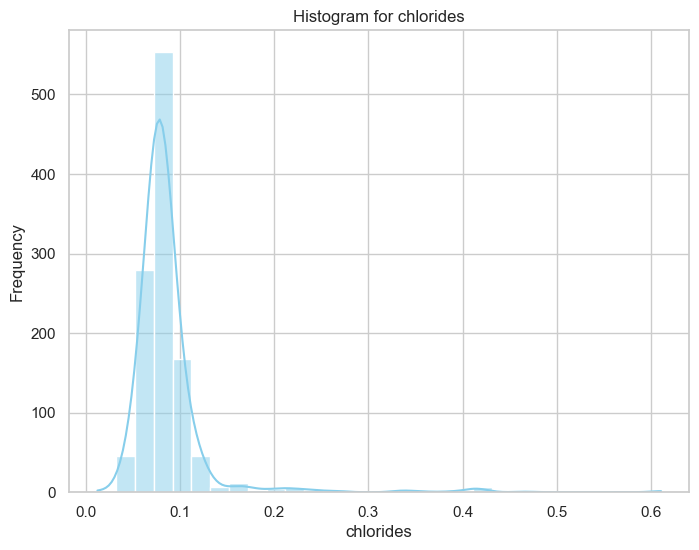

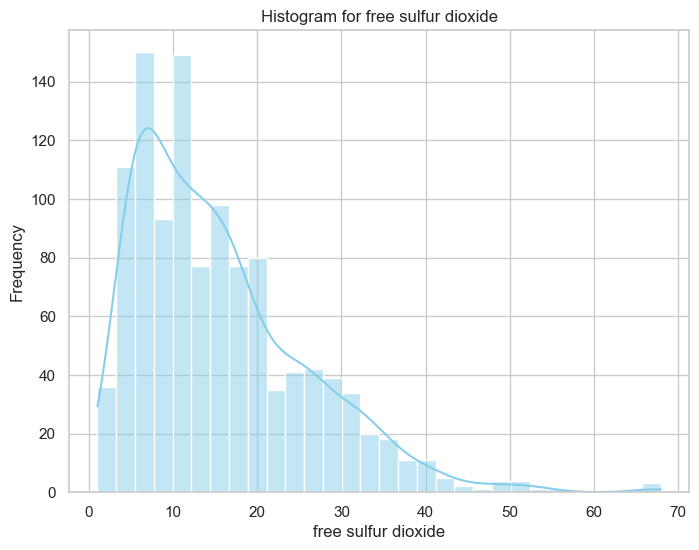

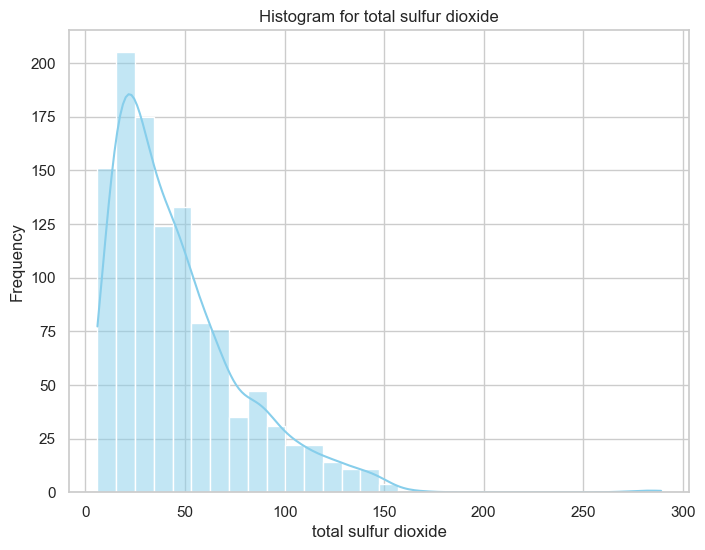

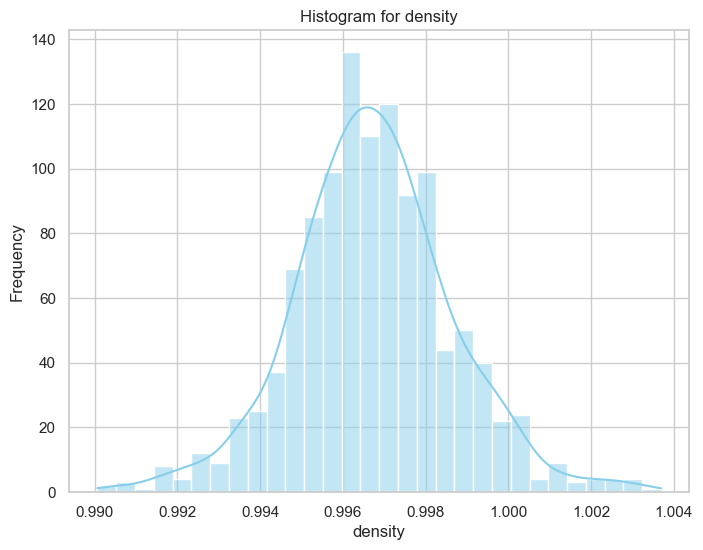

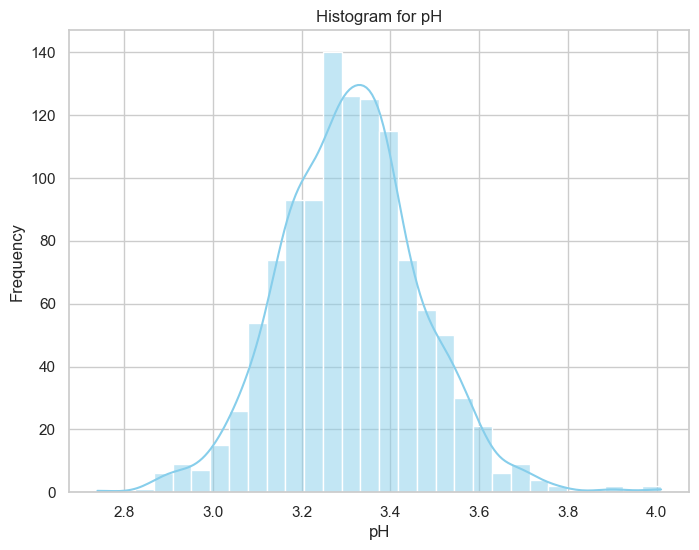

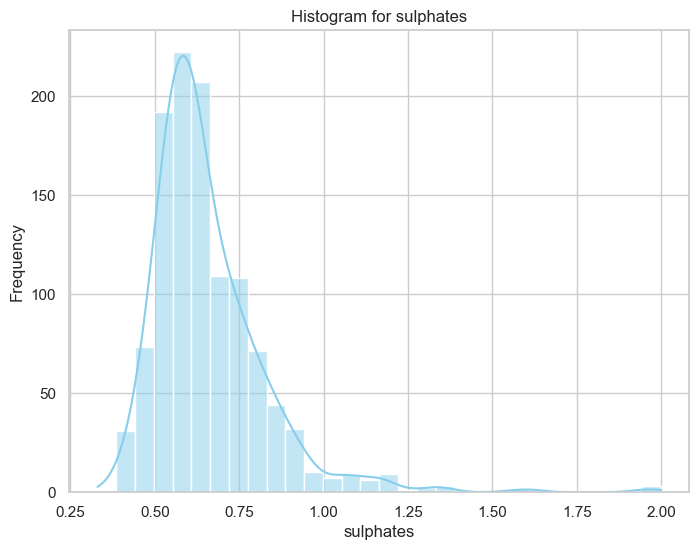

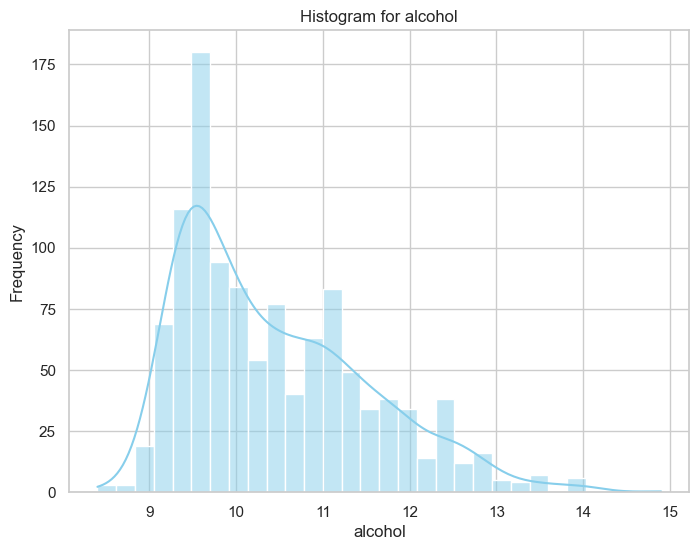

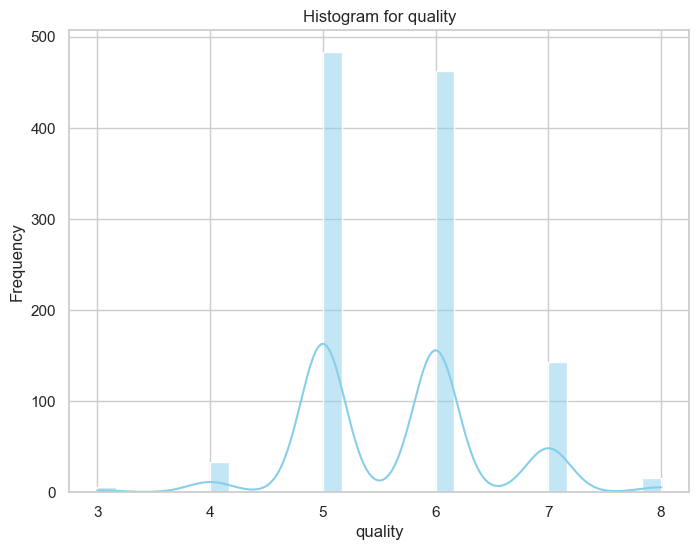

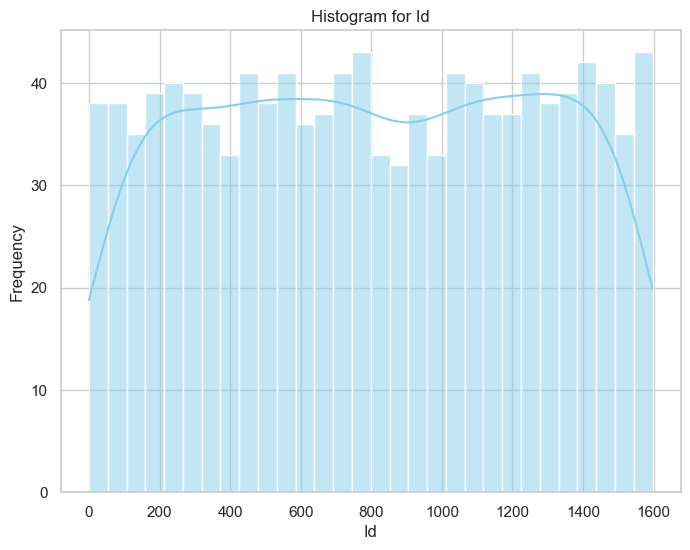

In [24]:
for column in numeric_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=column,kde=True,bins=30,color='skyblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

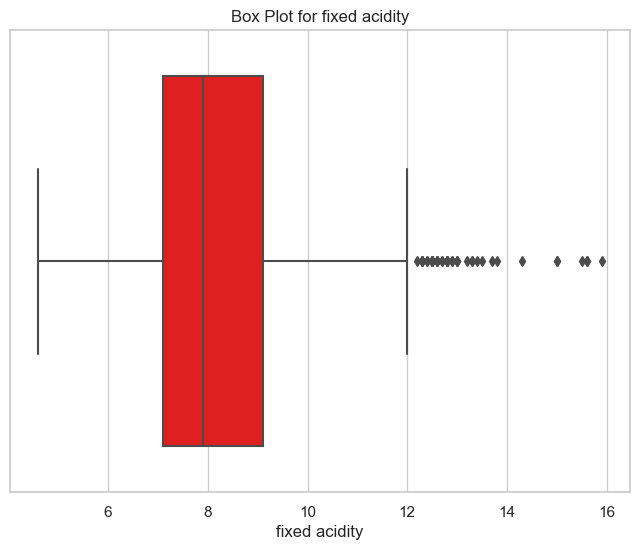

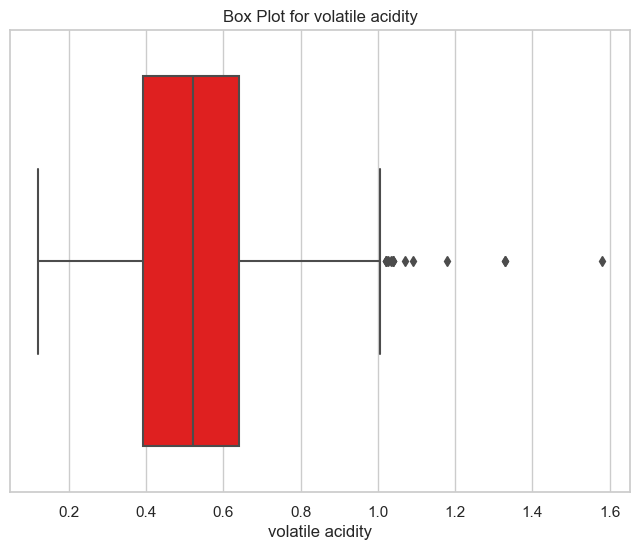

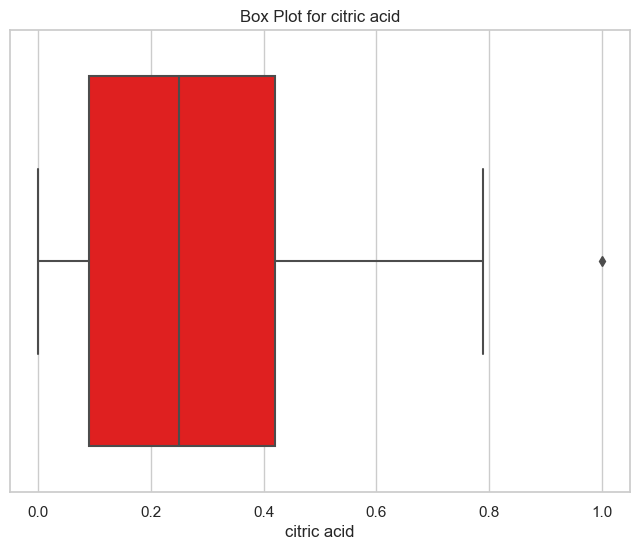

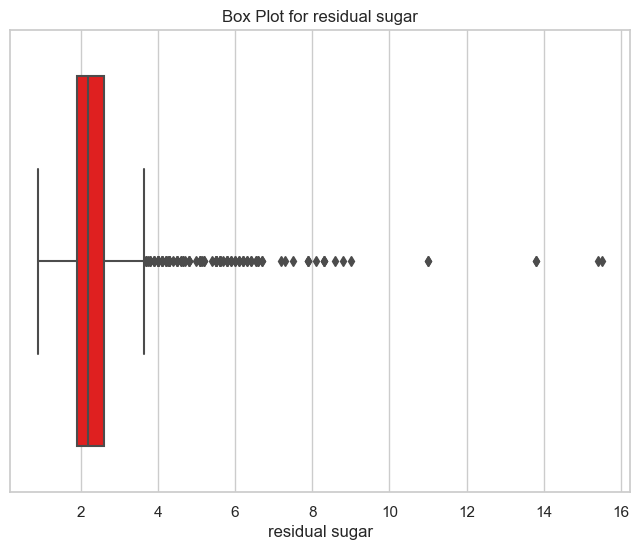

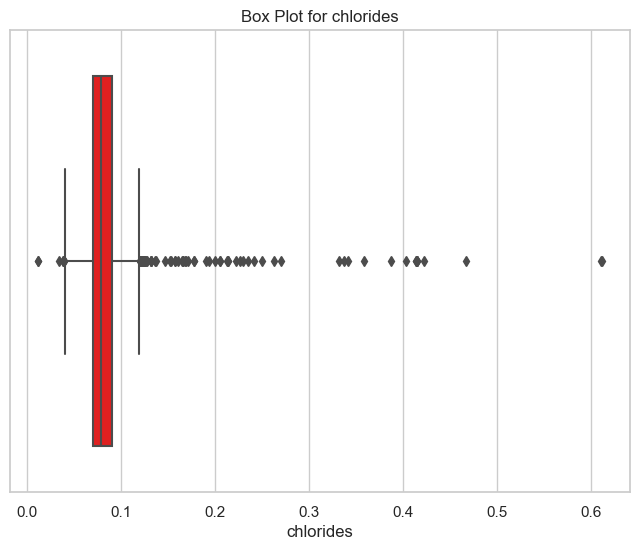

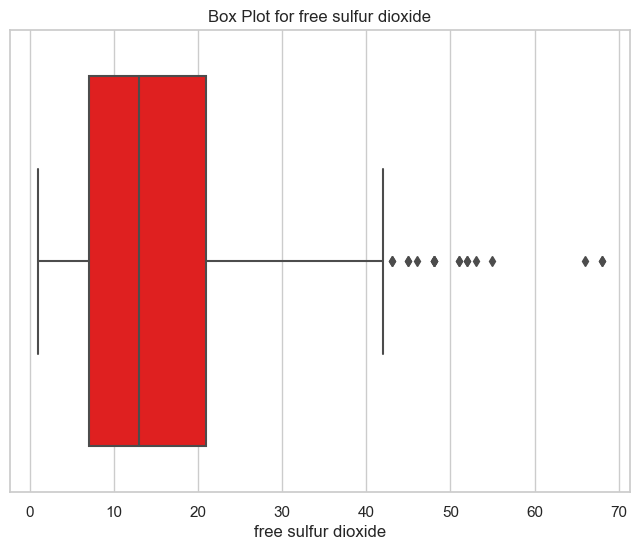

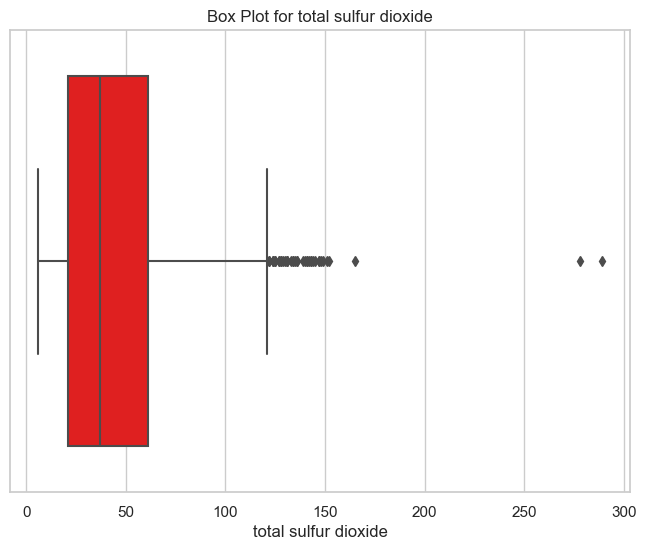

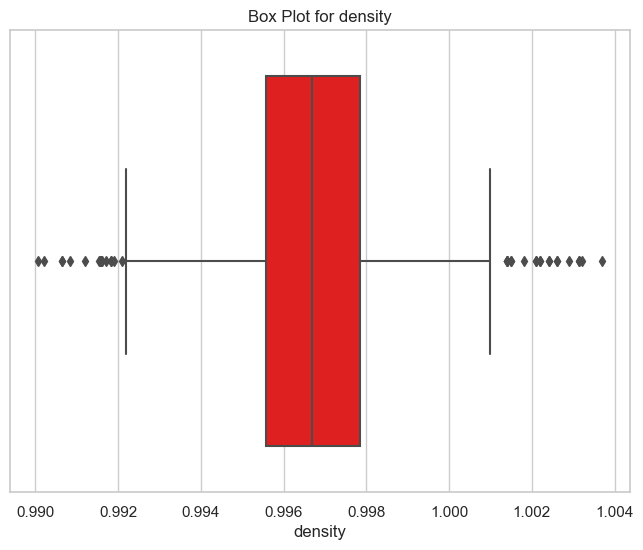

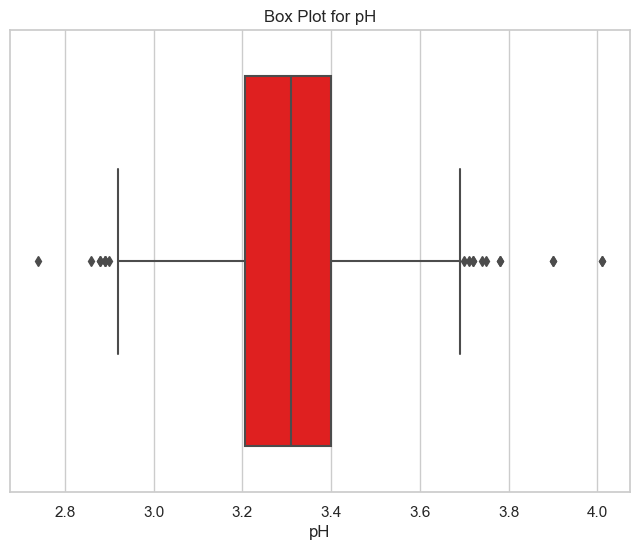

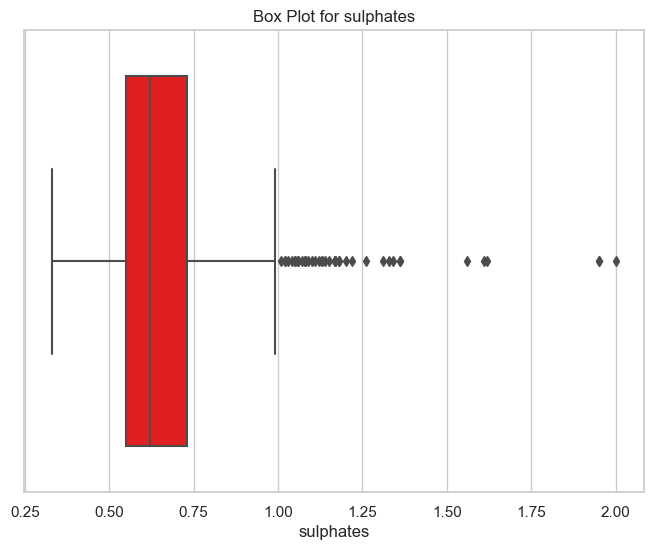

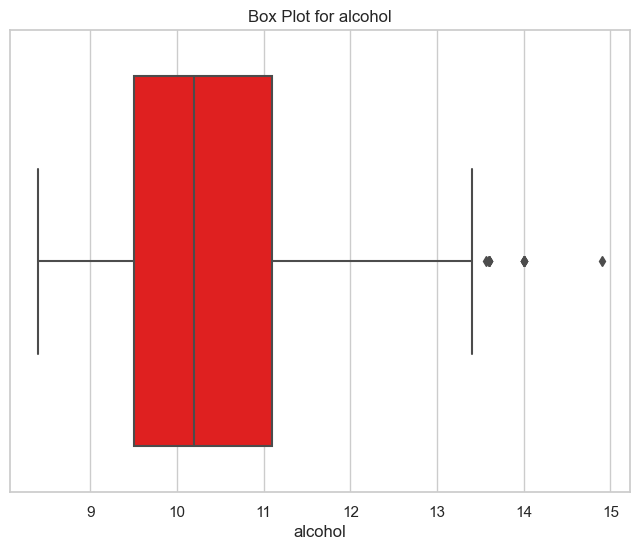

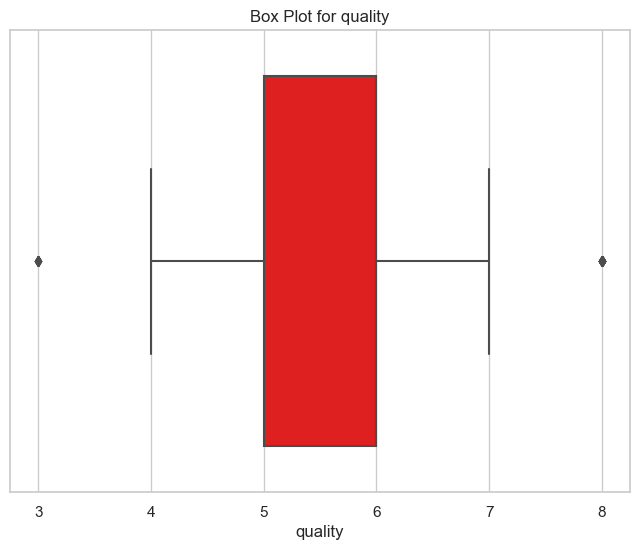

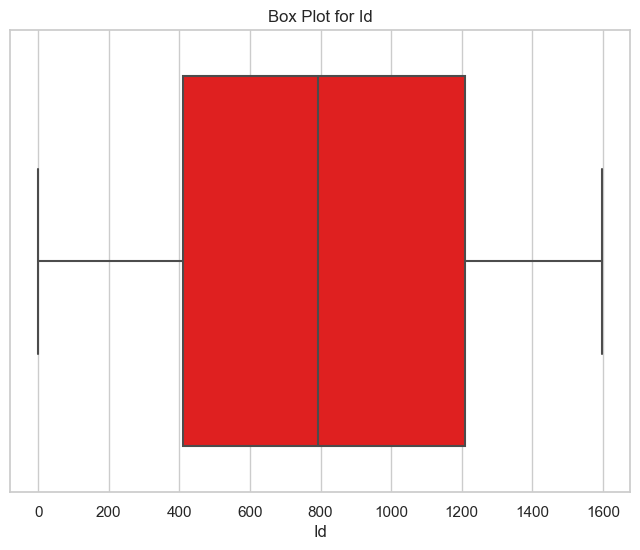

In [25]:
for column in numeric_columns:
    plt.figure(figsize =(8,6))
    sns.boxplot(x=df[column],color='red')
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()

In [28]:
correlation_matrix = numeric_columns.corr()

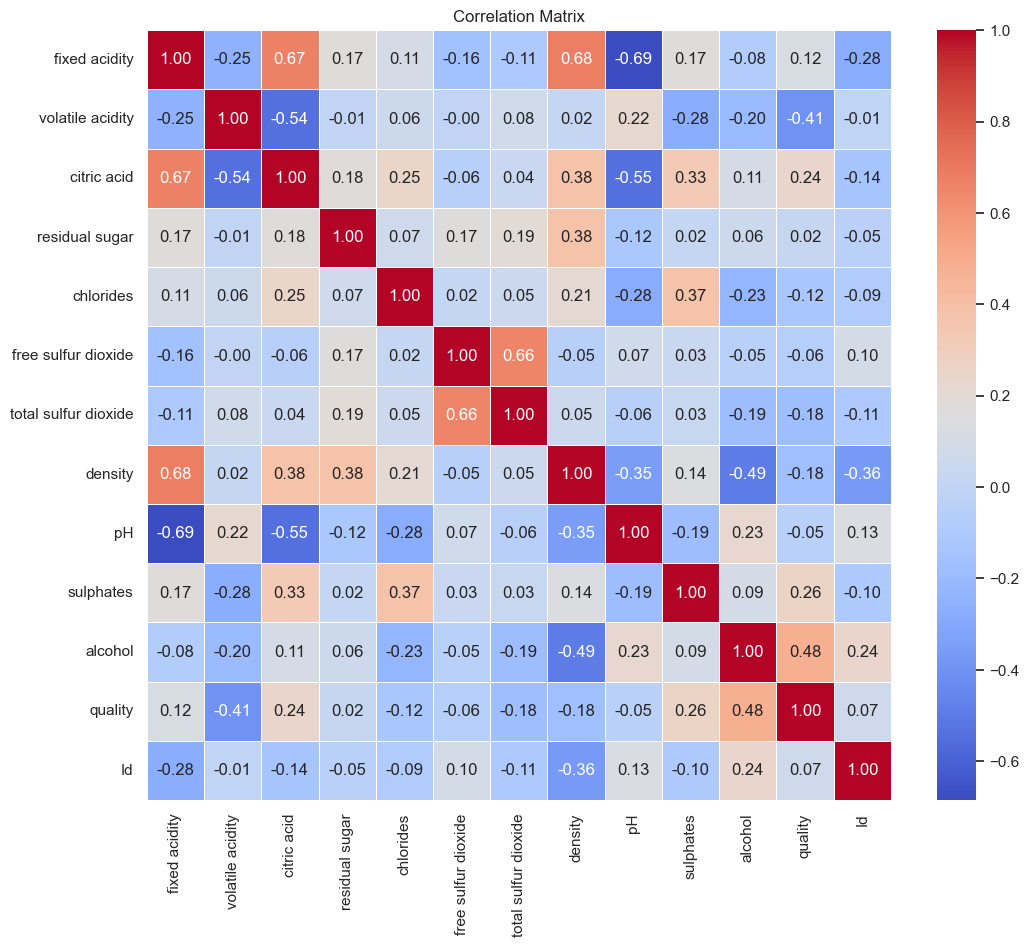

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()